# The Economic Calendar in the OpenBB SDK

Many people have a morning ritual, and the economic calendar will likely be part of the routine. Let's take a look at how the OpenBB SDK can be part of waking up. This notebook will use interactive tables; if,`itables`, is not already part of the Python environment where OpenBB is installed, add it now from the command line: `pip install itables`

In [1]:
# Imports

import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import requests
from openbb_terminal.sdk import openbb
from itables import init_notebook_mode
import itables.options as opt

In [2]:
# Display options for the tables

opt.column_filters = 'footer'
opt.dom = 'lrtip'
opt.lengthMenu = ['15', '25', '50', '100']
opt.maxBytes = 0
init_notebook_mode(all_interactive=True)
opt.style = "table-layout:auto;width:auto;margin:auto"
opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]

<IPython.core.display.Javascript object>

In [4]:
# Examples of helper functions for processing dates as argument inputs.

def date_today() -> datetime:
    return (datetime.today())

def date_today_shift(ndays:int = 0) -> datetime:
    return (datetime.today() + timedelta(days=ndays))

def previous_close() -> datetime:
    if datetime.today().weekday() > 0 <= 4:
        return (datetime.today() + timedelta(days =-1))
    elif datetime.today().weekday() == 0:
        return (datetime.today() + timedelta(days = -3))
    elif datetime.today().weekday() == 5:
        return (datetime.today() + timedelta(days = -2))
    elif datetime.today().weekday() == 6:
        return (datetime.today() + timedelta(days = -3))

def last_monday() -> datetime:
    if datetime.today().weekday() != 0:
        return (datetime.today() + timedelta(datetime.weekday(datetime.today())*(-1)))
    else:
        return (datetime.today() + timedelta(days = -7))

def next_monday() -> datetime:
    return (last_monday()+timedelta(days = 7))

def last_wednesday() -> datetime:
    return (last_monday()+timedelta(days = 2))

def next_wednesday() -> datetime:
    return (last_wednesday()+timedelta(days = 7))

def last_friday() -> datetime:
    return (last_monday()+timedelta(days = 4))

def next_friday() -> datetime:
    return (last_friday()+timedelta(days = 7))

def days_to_now (future_date: str) -> int:
    future_date = pd.to_datetime(future_date, infer_datetime_format = True)
    return (((future_date - datetime.today()).days)+1)

If today is a weekend, there may not be any results.

In [5]:
openbb.economy.events("united_states")

No data found for United States

Empty DataFrame
Columns: []
Index: []

The function has inputs for `start_date` and `end_date`, use the `next_monday()` and `next_friday()` helper functions to get the schedule of events for next week.

In [6]:
openbb.economy.events("united_states", next_monday(), next_friday())

Time (ET)        Country                                       Event  \
0      10:00  United States                  Durables Excluding Defense   
1      10:00  United States                Durables Excluding Transport   
2      10:00  United States                              Factory Orders   
3      10:00  United States            Factory orders ex transportation   
4      11:30  United States                        3-Month Bill Auction   
..       ...            ...                                         ...   
69     15:30  United States  CFTC Natural Gas speculative net positions   
70     15:30  United States      CFTC S&P 500 speculative net positions   
71     15:30  United States       CFTC Silver speculative net positions   
72     15:30  United States     CFTC Soybeans speculative net positions   
73     15:30  United States        CFTC Wheat speculative net positions   

   Actual Consensus Previous        Date  
0       -         -    -5.1%  2023-03-06  
1       -         -     0.7%  2023-03-06  
2       -     -1.8%     1.8%  2023-03-06  
3       -         -    -1.2%  2023-03-06  
4       -         -   4.750%  2023-03-06  
..    ...       ...      ...         ...  
69      -         -  -178.1K  2023-03-10  
70      -         -  -217.5K  2023-03-10  
71      -         -    13.5K  2023-03-10  
72      -         -   174.8K  2023-03-10  
73      -         -   -46.3K  2023-03-10  

[74 rows x 7 columns]

To get calendars from multiple countries, enter the first argument as a comma-separated list.

In [7]:
openbb.economy.events(["japan","spain"], next_monday(), next_friday())

Time (ET) Country                                   Event Actual Consensus  \
0      06:30   Spain             Spanish Consumer Confidence      -         -   
1      18:30   Japan                   Average Cash Earnings      -      1.9%   
2      18:30   Japan        Overall wage income of employees      -         -   
3      18:30   Japan                            Overtime Pay      -         -   
4      18:50   Japan                  Foreign Reserves (USD)      -         -   
5      22:35   Japan                     30-Year JGB Auction      -         -   
6      03:00   Spain           Spanish Industrial Production      -     -0.6%   
7      04:40   Spain         Spanish 12-Month Letras Auction      -         -   
8      04:40   Spain          Spanish 6-Month Letras Auction      -         -   
9      18:50   Japan                Adjusted Current Account      -         -   
10     18:50   Japan                            Bank Lending      -         -   
11     18:50   Japan                  Current Account n.s.a.      -   -0.818T   
12       24H   Japan                    Coincident Indicator      -         -   
13       24H   Japan                           Leading Index      -         -   
14       24H   Japan                           Leading Index      -      96.9   
15     01:00   Japan          Economy Watchers Current Index      -      49.1   
16     18:50   Japan                    Foreign Bonds Buying      -         -   
17     18:50   Japan  Foreign Investments in Japanese Stocks      -         -   
18     18:50   Japan                                     GDP      -      0.2%   
19     18:50   Japan                                     GDP      -      0.8%   
20     18:50   Japan                 GDP Capital Expenditure      -     -0.4%   
21     18:50   Japan                     GDP External Demand      -      0.3%   
22     18:50   Japan                 GDP Private Consumption      -      0.5%   
23     18:50   Japan                          M2 Money Stock      -      2.8%   
24     18:50   Japan                         M3 Money Supply      -         -   
25     01:00   Japan                     Machine Tool Orders      -         -   
26     05:00   Spain              Thomson Reuters IPSOS PCSI      -         -   
27     18:30   Japan                      Household Spending      -      1.4%   
28     18:30   Japan                      Household Spending      -     -0.1%   
29     18:50   Japan                                     PPI      -      8.4%   
30     18:50   Japan                                     PPI      -     -0.3%   
31     21:00   Japan              Thomson Reuters IPSOS PCSI      -         -   
32     22:00   Japan           BoJ Monetary Policy Statement      -         -   
33     22:00   Japan              BoJ Interest Rate Decision      -    -0.10%   
34       24H   Japan                    BoJ Press Conference      -         -   
35     03:00   Spain                    Spanish Retail Sales      -         -   
36     15:30   Japan      CFTC JPY speculative net positions      -         -   

    Previous        Date  
0       73.0  2023-03-06  
1       4.8%  2023-03-06  
2       4.8%  2023-03-06  
3      3.00%  2023-03-06  
4   1,250.2B  2023-03-06  
5     1.543%  2023-03-06  
6       0.6%  2023-03-07  
7     2.813%  2023-03-07  
8     2.675%  2023-03-07  
9    118.21T  2023-03-07  
10      3.1%  2023-03-07  
11    0.033T  2023-03-07  
12     -0.2%  2023-03-08  
13     -0.5%  2023-03-08  
14      97.2  2023-03-08  
15      48.5  2023-03-08  
16    211.6B  2023-03-08  
17   -403.0B  2023-03-08  
18      0.2%  2023-03-08  
19      0.6%  2023-03-08  
20     -0.5%  2023-03-08  
21     -0.6%  2023-03-08  
22      1.0%  2023-03-08  
23      2.7%  2023-03-08  
24  2,086.1T  2023-03-08  
25     -9.7%  2023-03-09  
26     43.31  2023-03-09  
27     -2.1%  2023-03-09  
28     -1.3%  2023-03-09  
29      9.5%  2023-03-09  
30      0.7%  2023-03-09  
31     36.63  2023-03-09  
32         -  2023-03-09  
33    

Get all countries by not including the argument. If a `start_date` is included, an `end_date` must also be present.

In [25]:
openbb.economy.events(start_date = next_monday(), end_date = next_friday())

Time (ET)      Country                                    Event Actual  \
0      02:00      Germany     German Current Account Balance n.s.a      -   
1      02:30  Switzerland                                      CPI      -   
2      02:30  Switzerland                                      CPI      -   
3      03:30        Italy  Italian IHS S&P Global Construction PMI      -   
4      03:30      Germany   German IHS S&P Global Construction PMI      -   
..       ...          ...                                      ...    ...   
73     15:30       Brazil       CFTC BRL speculative net positions      -   
74     15:30        Japan       CFTC JPY speculative net positions      -   
75     15:30  New Zealand       CFTC NZD speculative net positions      -   
76     15:30       Russia           CFTC RUB speculative positions      -   
77     15:30    Euro Zone       CFTC EUR speculative net positions      -   

   Consensus Previous        Date  
0          -    17.5B  2023-03-06  
1       0.4%     0.6%  2023-03-06  
2       3.1%     3.3%  2023-03-06  
3          -     48.2  2023-03-06  
4          -     43.3  2023-03-06  
..       ...      ...         ...  
73         -    33.4K  2023-03-10  
74         -   -29.1K  2023-03-10  
75         -    10.8K  2023-03-10  
76         -    -6.4K  2023-03-10  
77         -   165.0K  2023-03-10  

[264 rows x 7 columns]

The calendar may have a few standing items, but it will generally be populated towards the front month.

In [31]:
next_quarter = openbb.economy.events("united_states", start_date = date_today(), end_date = date_today_shift(90))

In [32]:
next_quarter

Time (ET)        Country                             Event Actual  \
0       10:00  United States        Durables Excluding Defense      -   
1       10:00  United States      Durables Excluding Transport      -   
2       10:00  United States                    Factory Orders      -   
3       10:00  United States  Factory orders ex transportation      -   
4       11:30  United States              3-Month Bill Auction      -   
..        ...            ...                               ...    ...   
152     13:00  United States        Fed Interest Rate Decision      -   
153     06:00  United States               OPEC Monthly Report      -   
154     11:00  United States                      WASDE Report      -   
155   All Day  United States      United States - Memorial Day      -   
156     05:00  United States                      OPEC Meeting      -   

    Consensus Previous        Date  
0           -    -5.1%  2023-03-06  
1           -     0.7%  2023-03-06  
2       -1.8%     1.8%  2023-03-06  
3           -    -1.2%  2023-03-06  
4           -   4.750%  2023-03-06  
..        ...      ...         ...  
152         -        -  2023-05-03  
153         -        -  2023-05-11  
154         -        -  2023-05-12  
155         -        -  2023-05-29  
156         -        -  2023-06-03  

[157 rows x 7 columns]

Find the FRED series ID with the `openbb.economy.fred_notes()` function.

In [53]:
openbb.economy.fred_notes("New Orders")

id realtime_start realtime_end  \
0              DGORDER     2023-03-05   2023-03-05   
1               UMDMNO     2023-03-05   2023-03-05   
2             NEWORDER     2023-03-05   2023-03-05   
3               UNXANO     2023-03-05   2023-03-05   
4               AMTMNO     2023-03-05   2023-03-05   
..                 ...            ...          ...   
995  USPTOISSUED048339     2023-03-05   2023-03-05   
996  USPTOISSUED048167     2023-03-05   2023-03-05   
997  USPTOISSUED051145     2023-03-05   2023-03-05   
998  USPTOISSUED053007     2023-03-05   2023-03-05   
999  USPTOISSUED053067     2023-03-05   2023-03-05   

                                                 title observation_start  \
0             Manufacturers' New Orders: Durable Goods        1992-02-01   
1             Manufacturers' New Orders: Durable Goods        1992-02-01   
2    Manufacturers' New Orders: Nondefense Capital\...        1992-02-01   
3    Manufacturers' New Orders: Nondefense Capital\...        1992-02-01   
4       Manufacturers' New Orders: Total Manufacturing        1992-02-01   
..                                                 ...               ...   
995    New Patent Assignments in Montgomery County, TX        1983-09-01   
996     New Patent Assignments in Galveston County, TX        1980-12-01   
997      New Patent Assignments in Powhatan County, VA        1981-04-01   
998        New Patent Assignments in Chelan County, WA        1986-01-01   
999      New Patent Assignments in Thurston County, WA        1987-02-01   

    observation_end frequency frequency_short                units  \
0        2023-01-01   Monthly               M  Millions of Dollars   
1        2023-01-01   Monthly               M  Millions of Dollars   
2        2023-01-01   Monthly               M  Millions of Dollars   
3        2023-01-01   Monthly               M  Millions of Dollars   
4        2022-12-01   Monthly               M  Millions of Dollars   
..              ...       ...             ...                  ...   
995      2022-02-01   Monthly               M              Patents   
996      2021-11-01   Monthly               M              Patents   
997      2021-08-01   Monthly               M              Patents   
998      2017-11-01   Monthly               M              Patents   
999      2021-04-01   Monthly               M              Patents   

    units_short      seasonal_adjustment seasonal_adjustment_short  \
0     Mil. of $      Seasonally Adjusted                        SA   
1     Mil. of $  Not Seasonally Adjusted                       NSA   
2     Mil. of $      Seasonally Adjusted                        SA   
3     Mil. of $  Not Seasonally Adjusted                       NSA   
4     Mil. of $      Seasonally Adjusted                        SA   
..          ...                      ...                       ...   
995     Patents  Not Seasonally Adjusted                       NSA   
996     Patents  Not Seasonally Adjusted                       NSA   
997     Patents  Not Seasonally Adjusted                       NSA   
998     Patents  Not Seasonally Adjusted                       NSA   
999     Patents  Not Seasonally Adjusted                       NSA   

               last_updated  popularity  group_popularity  \
0    2023-02-27 07:31:02-06          70                70   
1    2023-02-27 07:31:13-06          20                70   
2    2023-02-27 07:31:05-06          64                65   
3    2023-02-27 07:31:14-06          15                65   
4    2023-02-02 09:03:02-06          61                61   
..                      ...         ...               ...   
995  2022-06-15 10:42:13-05           1                 1   
996  2022-06-15 13:02:37-05           1                 1   
997  2022-06-15 10:41:18-05           1                 1   
998  2018-05-29 09:51:24-05           1                 1   
999  2022-06-15 10:40:25-05           1                 1   

                                           

Interactive tables make it quick and easy to narrow down a search without having to code a query function.

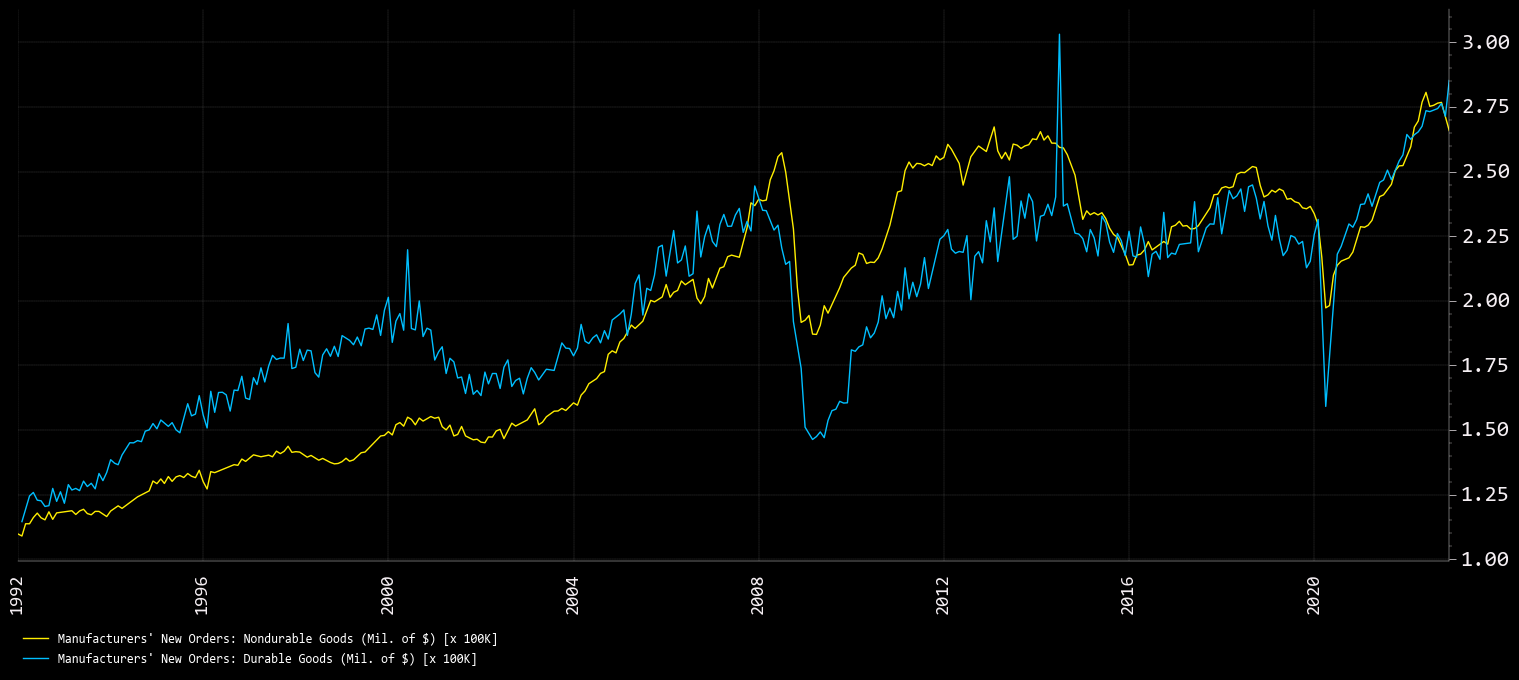

In [59]:
openbb.economy.fred_chart(series_ids = ['AMNMNO', 'DGORDER'])

In [60]:
openbb.economy.fred_notes("Wholesale Inventories")

id realtime_start realtime_end  \
0              WHLSLRIRSA     2023-03-05   2023-03-05   
1             WHLSLRIRNSA     2023-03-05   2023-03-05   
2              WHLSLRIMSA     2023-03-05   2023-03-05   
3             WHLSLRIMNSA     2023-03-05   2023-03-05   
4           WHLSLRMPCIMSA     2023-03-05   2023-03-05   
..                    ...            ...          ...   
329     IPUGN42T011000000     2023-03-05   2023-03-05   
330     IPUGN42T300000000     2023-03-05   2023-03-05   
331     IPUGN42T301000000     2023-03-05   2023-03-05   
332  IPUGN42421T300000000     2023-03-05   2023-03-05   
333  IPUGN42421T301000000     2023-03-05   2023-03-05   

                                                 title observation_start  \
0     Merchant Wholesalers: Inventories to Sales Ratio        1992-01-01   
1     Merchant Wholesalers: Inventories to Sales Ratio        1992-01-01   
2                     Merchant Wholesalers Inventories        1992-01-01   
3                     Merchant Wholesalers Inventories        1992-01-01   
4                     Merchant Wholesalers Inventories        1992-02-01   
..                                                 ...               ...   
329  Real Sectoral Output for Wholesale Trade:\nWho...        1988-01-01   
330  Sectoral Output for Wholesale Trade: Wholesale...        1987-01-01   
331  Sectoral Output for Wholesale Trade: Wholesale...        1988-01-01   
332  Sectoral Output for Wholesale Trade: Drugs and...        1987-01-01   
333  Sectoral Output for Wholesale Trade: Drugs and...        1988-01-01   

    observation_end               frequency frequency_short  \
0        2022-12-01  Monthly, End of Period               M   
1        2022-12-01  Monthly, End of Period               M   
2        2022-12-01  Monthly, End of Period               M   
3        2022-12-01  Monthly, End of Period               M   
4        2022-12-01  Monthly, End of Period               M   
..              ...                     ...             ...   
329      2021-01-01                  Annual               A   
330      2021-01-01                  Annual               A   
331      2021-01-01                  Annual               A   
332      2021-01-01                  Annual               A   
333      2021-01-01                  Annual               A   

                            units          units_short  \
0                           Ratio                Ratio   
1                           Ratio                Ratio   
2             Millions of Dollars            Mil. of $   
3             Millions of Dollars            Mil. of $   
4                  Percent Change               % Chg.   
..                            ...                  ...   
329  Percent Change from Year Ago  % Chg. from Yr. Ago   
330           Millions of Dollars            Mil. of $   
331  Percent Change from Year Ago  % Chg. from Yr. Ago   
332           Millions of Dollars            Mil. of $   
333  Percent Change from Year Ago  % Chg. from Yr. Ago   

         seasonal_adjustment seasonal_adjustment_short  \
0        Seasonally Adjusted                        SA   
1    Not Seasonally Adjusted                       NSA   
2        Seasonally Adjusted                        SA   
3    Not Seasonally Adjusted                       NSA   
4        Seasonally Adjusted                        SA   
..                       ...                       ...   
329  Not Seasonally Adjusted                       NSA   
330  Not Seasonally Adjusted                       NSA   
331  Not Seasonally Adjusted                       NSA   
332  Not Seasonally Adjusted                       NSA   
333  Not Seasonally Adjusted                       NSA   

               last_updated  popularity  group_popularity  \
0    2023-02-15 09:01:08-06          40                40   
1    2023-02-15 09:01:13-06           4                40   
2    2023-02-15 09:01:07-06          30                34   
3    2023-02-15 09:01:13-06   

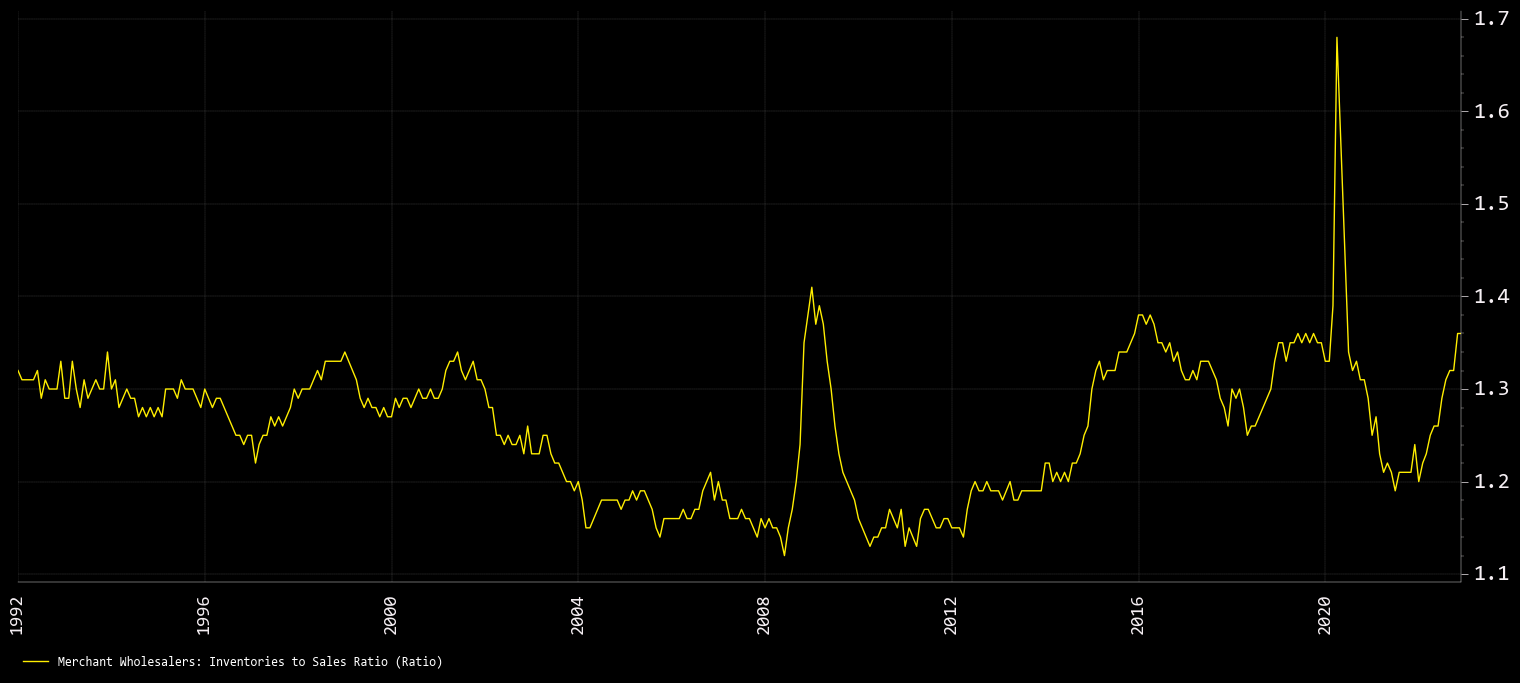

In [64]:
openbb.economy.fred_chart(['WHLSLRIRSA'])